# Step 1:

The data has been split into two groups:

* training set (train.csv)
* test set (test.csv)

**Variable Notes**

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [125]:
# Libraries Included

# Preprocessing 
import numpy as np 
import pandas as pd 

# Visualization
import seaborn as sns 
import matplotlib.pyplot as plt

import os
print(os.listdir("../input"))

['gender_submission.csv', 'test.csv', 'train.csv']


In [126]:
# Import Dataset
data_train = pd.read_csv("../input/train.csv")
data_test = pd.read_csv("../input/test.csv")

# Step 2:

* Data Print
* Data Visualization
* Number of Attributes
* Number of Records
* Missing Data Analyze

In [127]:

data_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S
178,179,0,2,"Hale, Mr. Reginald",male,30.0,0,0,250653,13.0000,NaN,S
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
384,385,0,3,"Plotcharsky, Mr. Vasil",male,NaN,0,0,349227,7.8958,NaN,S
756,757,0,3,"Carlsson, Mr. August Sigfrid",male,28.0,0,0,350042,7.7958,NaN,S


In [128]:

data_test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
349,1241,2,"Walcroft, Miss. Nellie",female,31.0,0,0,F.C.C. 13528,21.0000,NaN,S
208,1100,1,"Rosenbaum, Miss. Edith Louise",female,33.0,0,0,PC 17613,27.7208,A11,C
233,1125,3,"Linehan, Mr. Michael",male,NaN,0,0,330971,7.8792,NaN,Q
243,1135,3,"Hyman, Mr. Abraham",male,NaN,0,0,3470,7.8875,NaN,S
150,1042,1,"Earnshaw, Mrs. Boulton (Olive Potter)",female,23.0,0,1,11767,83.1583,C54,C


In [129]:
data_train.info()
print("---------------------------------*10")
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
---------------------------------*10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null obj

In [130]:

data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [131]:

data_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [132]:
data_train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Chapman, Mr. John Henry",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [133]:
data_test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Christy, Mrs. (Alice Frances)",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [134]:

print(pd.isnull(data_train).sum())
print("-------------------------")
print(pd.isnull(data_test).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
-------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


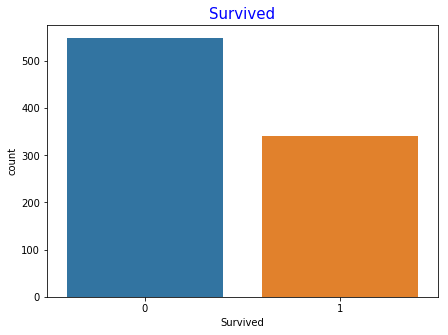

In [135]:

survived = data_train.Survived
plt.figure(figsize=(7,5))
sns.countplot(survived)
plt.title("Survived",color='blue',fontsize=15)
plt.show()

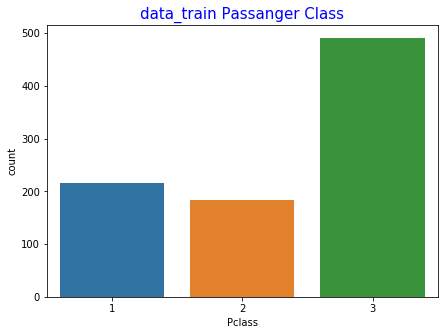

In [136]:
passanger_class = data_train.Pclass
plt.figure(figsize=(7,5))
sns.countplot(passanger_class)
plt.title("data_train Passanger Class",color = 'blue',fontsize=15)
plt.show()

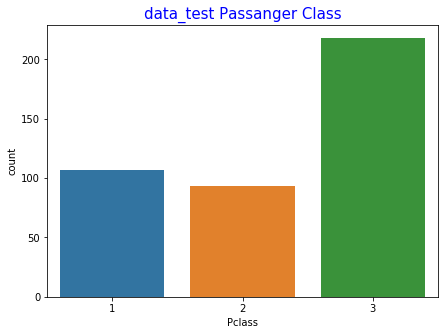

In [137]:
passanger_class = data_test.Pclass
plt.figure(figsize=(7,5))
sns.countplot(passanger_class)
plt.title("data_test Passanger Class",color = 'blue',fontsize=15)
plt.show()

# Step 4: 

I've splitted according to prefix of name. I've added them becoming a new column. 


### Step 3 Is has been done after step 4: 

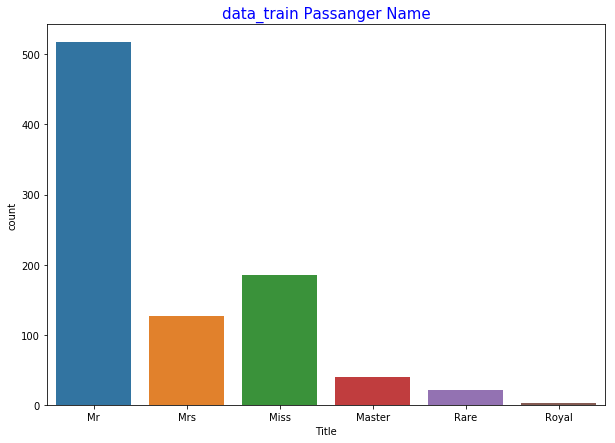

In [138]:
data_train['Title'] = data_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

data_train['Title'] = data_train['Title'].replace(['Lady', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
data_train['Title'] = data_train['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
data_train['Title'] = data_train['Title'].replace('Mlle', 'Miss')
data_train['Title'] = data_train['Title'].replace('Ms', 'Miss')
data_train['Title'] = data_train['Title'].replace('Mme', 'Mrs')

passanger_name = data_train.Title
plt.figure(figsize=(10,7))
sns.countplot(passanger_name)
plt.title("data_train Passanger Name",color = 'blue',fontsize=15)
plt.show()

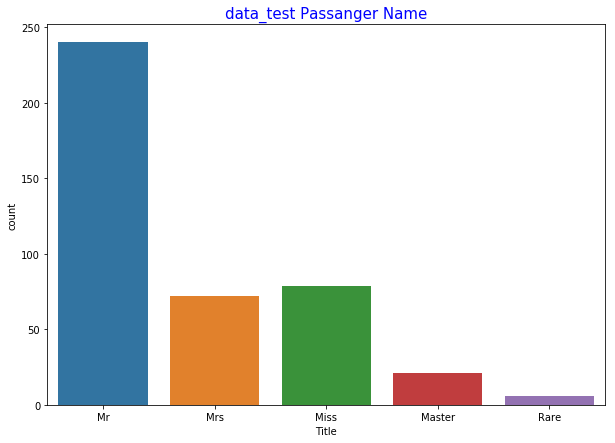

In [139]:
data_test['Title'] = data_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

data_test['Title'] = data_test['Title'].replace(['Lady', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
data_test['Title'] = data_test['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
data_test['Title'] = data_test['Title'].replace('Mlle', 'Miss')
data_test['Title'] = data_test['Title'].replace('Ms', 'Miss')
data_test['Title'] = data_test['Title'].replace('Mme', 'Mrs')

passanger_name = data_test.Title
plt.figure(figsize=(10,7))
sns.countplot(passanger_name)
plt.title("data_test Passanger Name",color = 'blue',fontsize=15)
plt.show()

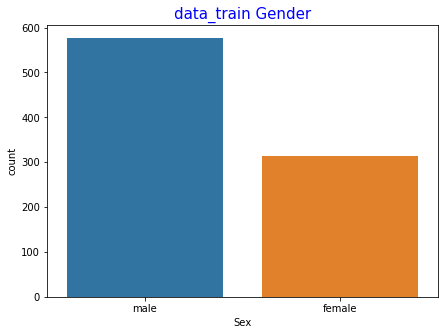

In [140]:
gender = data_train.Sex
plt.figure(figsize=(7,5))
sns.countplot(gender)
plt.title("data_train Gender",color = 'blue',fontsize=15)
plt.show()

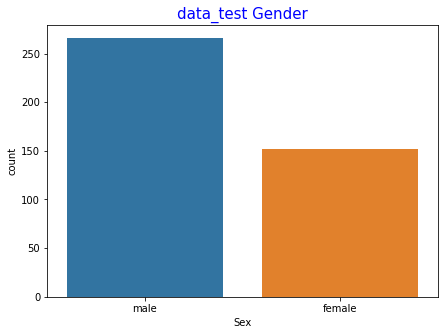

In [141]:
gender = data_test.Sex
plt.figure(figsize=(7,5))
sns.countplot(gender)
plt.title("data_test Gender",color = 'blue',fontsize=15)
plt.show()

I've created age groups. I've added them becoming a new column. 

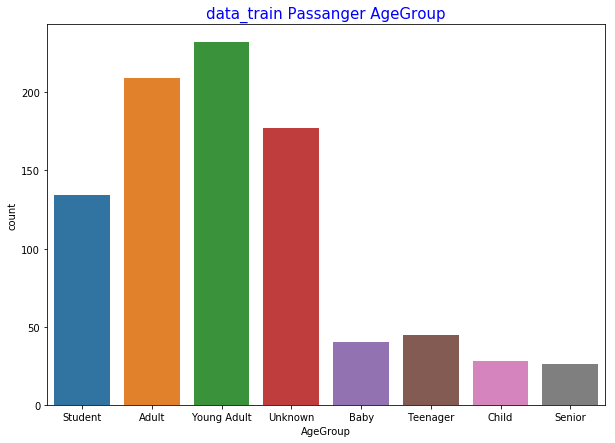

In [142]:
data_train['AgeGroup'] = ["Baby" if (i>=0 and i<5) else "Child" if (i>=5 and i<12) else "Teenager" if (i>=12 and i<18) 
                          else "Student" if(i>=18 and i<24) else "Young Adult" if(i>=24 and i<35) 
                          else "Adult" if(i>=35 and i<60) else "Senior" if(i>=60) else "Unknown" 
                          for i in data_train.Age ]

passanger_ageGroup = data_train.AgeGroup
plt.figure(figsize=(10,7))
sns.countplot(passanger_ageGroup)
plt.title("data_train Passanger AgeGroup",color = 'blue',fontsize=15)
plt.show()

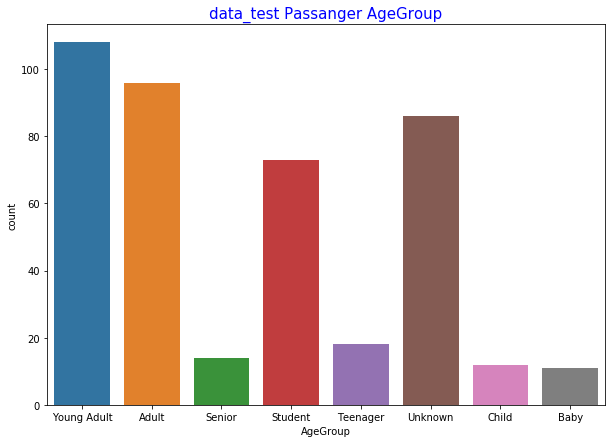

In [143]:
data_test['AgeGroup'] = ["Baby" if (i>=0 and i<5) else "Child" if (i>=5 and i<12) else "Teenager" if (i>=12 and i<18) 
                          else "Student" if(i>=18 and i<24) else "Young Adult" if(i>=24 and i<35) 
                          else "Adult" if(i>=35 and i<60) else "Senior" if(i>=60) else "Unknown" 
                          for i in data_test.Age ]

passanger_ageGroup = data_test.AgeGroup
plt.figure(figsize=(10,7))
sns.countplot(passanger_ageGroup)
plt.title("data_test Passanger AgeGroup",color = 'blue',fontsize=15)
plt.show()

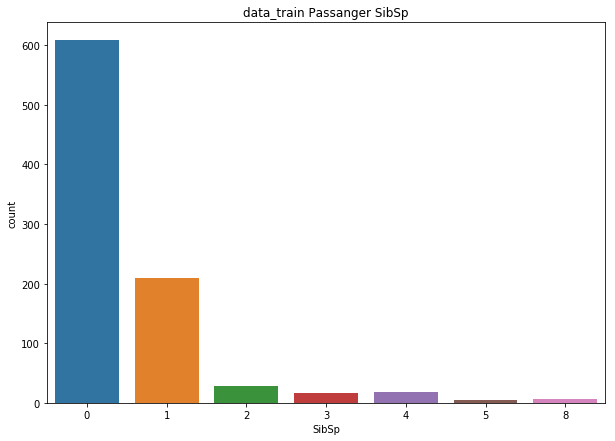

In [144]:
passanger_sibsp = data_train.SibSp
plt.figure(figsize=(10,7))
sns.countplot(passanger_sibsp)
plt.title("data_train Passanger SibSp")
plt.show()

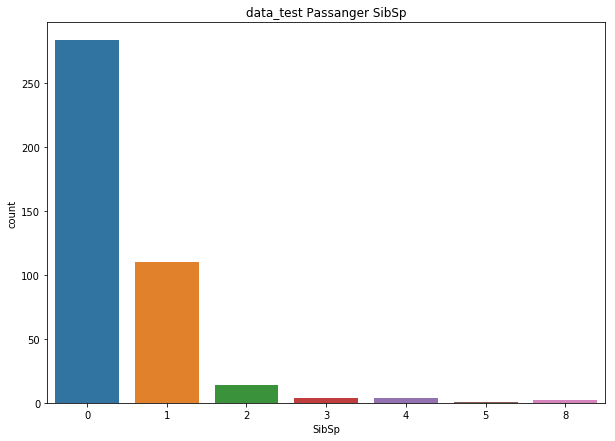

In [145]:
passanger_sibsp = data_test.SibSp
plt.figure(figsize=(10,7))
sns.countplot(passanger_sibsp)
plt.title("data_test Passanger SibSp")
plt.show()

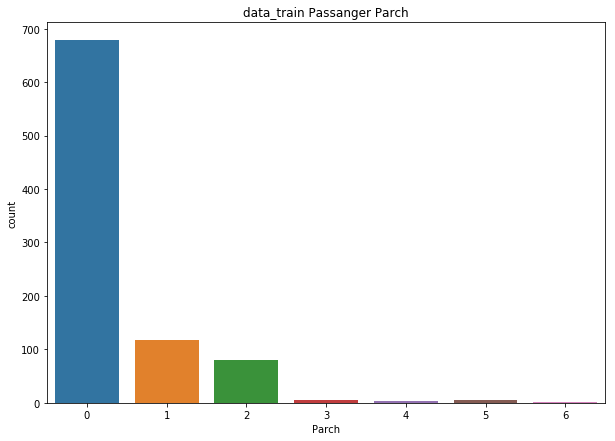

In [146]:
passanger_parch = data_train.Parch
plt.figure(figsize=(10,7))
sns.countplot(passanger_parch)
plt.title("data_train Passanger Parch")
plt.show()

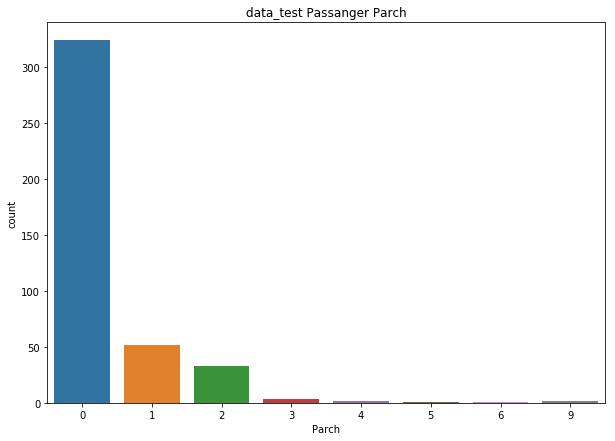

In [147]:
passanger_parch = data_test.Parch
plt.figure(figsize=(10,7))
sns.countplot(passanger_parch)
plt.title("data_test Passanger Parch")
plt.show()

In [148]:
data_train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

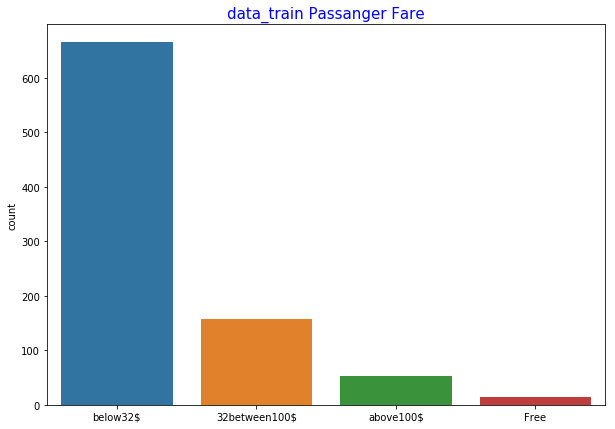

In [149]:
passanger_fare = ['above100$' if i>=100 else '32between100$' if (i<100 and i>=32) else 'Free' if i==0 else 'below32$' for i in data_train.Fare]
plt.figure(figsize=(10,7))
sns.countplot(passanger_fare)
plt.title("data_train Passanger Fare",color = 'blue',fontsize=15)
plt.show()

In [150]:
data_test.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

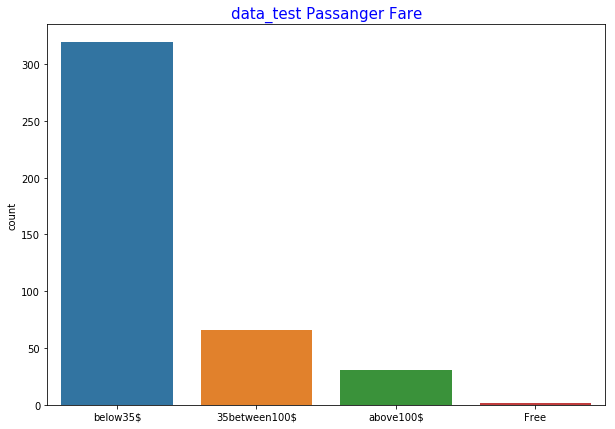

In [151]:
passanger_fare_test = ['above100$' if i>=100 else '35between100$' if (i<100 and i>=35) else 'Free' if i==0 else 'below35$' for i in data_test.Fare]
plt.figure(figsize=(10,7))
sns.countplot(passanger_fare_test)
plt.title("data_test Passanger Fare",color = 'blue',fontsize=15)
plt.show()

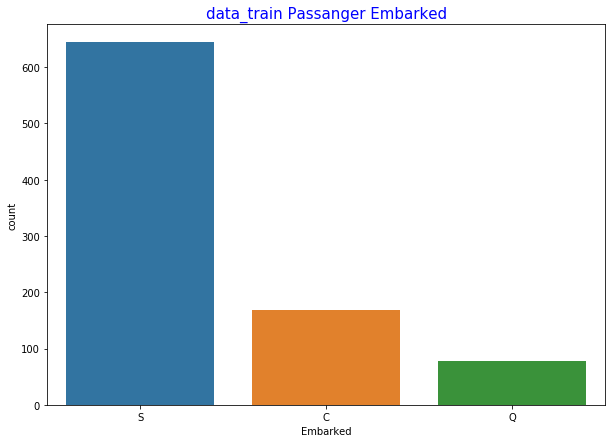

In [152]:
passanger_embarked = data_train.Embarked
plt.figure(figsize=(10,7))
sns.countplot(passanger_embarked)
plt.title("data_train Passanger Embarked",color = 'blue',fontsize=15)
plt.show()

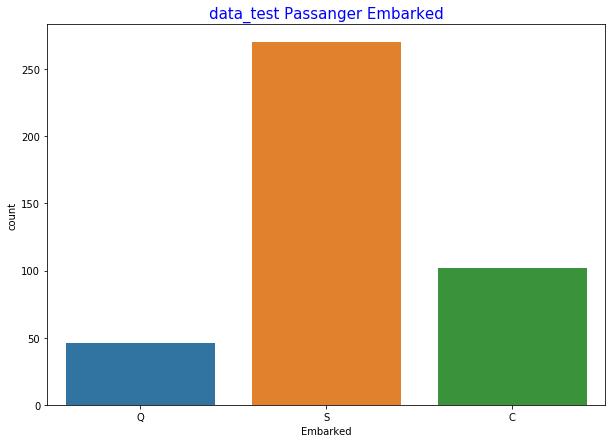

In [153]:
passanger_embarked = data_test.Embarked
plt.figure(figsize=(10,7))
sns.countplot(passanger_embarked)
plt.title("data_test Passanger Embarked",color = 'blue',fontsize=15)
plt.show()

# Step 3:

* Correlation Matrix Using Spearman Chi squared Value where -1.0 <=  x <= 1

-> if x < 0 then the features are negatively correlated.

-> if x > 0 then the features are positively correlated.

-> if x == 0 then the features have no correlation. 

In [154]:
data_train.apply(lambda x : pd.factorize(x)[0]).corr(method='spearman', min_periods=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup
PassengerId,1.000000,-0.005007,0.022371,1.000000,-0.042939,0.087952,-0.018775,0.001294,0.750422,0.244103,0.077313,-0.025688,-0.038587,-0.009785
Survived,-0.005007,1.000000,0.277523,-0.005007,0.543351,0.048930,-0.173898,0.138338,-0.039201,0.180932,0.316508,0.130585,0.491243,0.032201
Pclass,0.022371,0.277523,1.000000,0.022371,0.126841,0.217013,-0.183808,0.033375,0.029155,0.122640,0.344055,-0.110803,0.122751,-0.126631
Name,1.000000,-0.005007,0.022371,1.000000,-0.042939,0.087952,-0.018775,0.001294,0.750422,0.244103,0.077313,-0.025688,-0.038587,-0.009785
Sex,-0.042939,0.543351,0.126841,-0.042939,1.000000,0.016926,-0.118704,0.254439,-0.128758,0.144341,0.130542,0.114918,0.737674,0.010457
Age,0.087952,0.048930,0.217013,0.087952,0.016926,1.000000,-0.026893,0.139845,0.042324,0.078487,0.175400,-0.165496,0.071352,-0.174937
SibSp,-0.018775,-0.173898,-0.183808,-0.018775,-0.118704,-0.026893,1.000000,-0.006966,-0.018571,-0.115377,-0.143267,-0.046180,0.007559,0.093772
Parch,0.001294,0.138338,0.033375,0.001294,0.254439,0.139845,-0.006966,1.000000,-0.264802,0.163157,0.070443,-0.052951,0.377535,0.181227
Ticket,0.750422,-0.039201,0.029155,0.750422,-0.128758,0.042324,-0.018571,-0.264802,1.000000,0.227846,0.060498,-0.020282,-0.169841,-0.097202
Fare,0.244103,0.180932,0.122640,0.244103,0.144341,0.078487,-0.115377,0.163157,0.227846,1.000000,0.303480,0.146699,0.149932,0.011721


In [155]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Adult


In [156]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,Young Adult
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,Adult
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,Senior
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,Young Adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,Student


I've given a number to classify.

In [157]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
data_train['Title'] = data_train['Title'].map(title_mapping)
data_train['Title'] = data_train['Title'].fillna(0)

data_test['Title'] = data_test['Title'].map(title_mapping)
data_test['Title'] = data_test['Title'].fillna(0)

#data_test.Title.head()
#data_train.Title.head()

In [158]:
data_train.Sex = [0 if i=="male" else 1 for i in data_train.Sex]
data_test.Sex = [0 if i=="male" else 1 for i in data_test.Sex]
data_test.Sex.head()
data_train.Sex.head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [159]:
data_train['Age'] = data_train['Age'].fillna(0)
data_test['Age'] = data_test['Age'].fillna(0)
print("Missing train age value count:",pd.isnull(data_test.Age).sum())
print("Missing test age value count:",pd.isnull(data_train.Age).sum())

Missing train age value count: 0
Missing test age value count: 0


In [160]:
title_mapping_age = {"Baby":1, "Child":2, "Teenager":3, "Student":4, "Young Adult":5, "Adult":6, "Senior":7, "Unknow":0}
data_train['AgeGroup'] = data_train['AgeGroup'].map(title_mapping_age)
data_train['AgeGroup'] = data_train['AgeGroup'].fillna(0)
data_test['AgeGroup'] = data_test['AgeGroup'].map(title_mapping_age)
data_test['AgeGroup'] = data_test['AgeGroup'].fillna(0)
#data_test.AgeGroup.head()
#data_train.AgeGroup.head()

I found passengers, which joined with their family or alone, by picking up counts of sibsp and parch.

In [161]:
#train
data_train['FamilySize'] = data_train['SibSp'] + data_train['Parch']
data_train['IsAlone'] = [0 if i==0 else 1 for i in data_train['FamilySize']]# 0 equals alone 1 equals family
data_train["CabinBool"] = (data_train["Cabin"].notnull().astype('int'))
data_train['FareBand'] = [4 if i=='above100$' else 3 if i=='32between100$' else 2 if i=='Free' else 1 for i in passanger_fare]
data_train.Embarked = [0 if i=="S" else 1 if i=="C" else 2 if i=="Q" else 0 for i in data_train.Embarked]
data_train['Embarked'] = data_train['Embarked'].fillna(0)
print(pd.isnull(data_train.Embarked).sum())

#test
data_test['FamilySize'] = data_test['SibSp'] + data_test['Parch']
data_test['IsAlone'] = [0 if i==0 else 1 for i in data_test['FamilySize']]# 0 equals alone 1 equals family
data_test["CabinBool"] = (data_test["Cabin"].notnull().astype('int'))
data_test['FareBand'] = [4 if i=='above100$' else 3 if i=='35between100$' else 2 if i=='Free' else 1 for i in passanger_fare_test]

data_test.Embarked = [0 if i=="S" else 1 if i=="C" else 2 if i=="Q" else 0 for i in data_test.Embarked]
print(pd.isnull(data_test.Embarked).sum())

data_train.head()

0
0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup,FamilySize,IsAlone,CabinBool,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,4.0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,3,6.0,1,1,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,5.0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,3,6.0,1,1,1,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,6.0,0,0,0,1


In [162]:
data_train_x = data_train.drop(['PassengerId','Survived','Name','Cabin','SibSp','Parch','Age','Fare','Ticket'],axis=1)
data_train_y = data_train.Survived
data_train_x.head()

,Pclass,Sex,Embarked,Title,AgeGroup,FamilySize,IsAlone,CabinBool,FareBand
0,3,0,0,1,4.0,1,1,0,1
1,1,1,1,3,6.0,1,1,1,3
2,3,1,0,2,5.0,0,0,0,1
3,1,1,0,3,6.0,1,1,1,3
4,3,0,0,1,6.0,0,0,0,1


In [163]:
data_test_x = data_test.drop(['PassengerId','Name','Cabin','SibSp','Parch','Age','Fare','Ticket'],axis=1)
data_test_x.head()

,Pclass,Sex,Embarked,Title,AgeGroup,FamilySize,IsAlone,CabinBool,FareBand
0,3,0,2,1,5.0,0,0,0,1
1,3,1,0,3,6.0,1,1,0,1
2,2,0,2,1,7.0,0,0,0,1
3,3,0,0,1,5.0,0,0,0,1
4,3,1,0,3,4.0,2,1,0,1


In [164]:
#normalization
data_train_x = (data_train_x - np.min(data_train_x))/(np.max(data_train_x)-np.min(data_train_x)).values
data_train_x.head()

,Pclass,Sex,Embarked,Title,AgeGroup,FamilySize,IsAlone,CabinBool,FareBand
0,1.0,0.0,0.0,0.0,0.571429,0.1,1.0,0.0,0.000000
1,0.0,1.0,0.5,0.4,0.857143,0.1,1.0,1.0,0.666667
2,1.0,1.0,0.0,0.2,0.714286,0.0,0.0,0.0,0.000000
3,0.0,1.0,0.0,0.4,0.857143,0.1,1.0,1.0,0.666667
4,1.0,0.0,0.0,0.0,0.857143,0.0,0.0,0.0,0.000000


In [165]:
#normalization
data_test_x = (data_test_x - np.min(data_test_x))/(np.max(data_test_x)-np.min(data_test_x)).values
data_test_x.head()

,Pclass,Sex,Embarked,Title,AgeGroup,FamilySize,IsAlone,CabinBool,FareBand
0,1.0,0.0,1.0,0.0,0.714286,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.4,0.857143,0.1,1.0,0.0,0.0
2,0.5,0.0,1.0,0.0,1.000000,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.714286,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.4,0.571429,0.2,1.0,0.0,0.0


# Step 5: 

* Classification Model Selection.

In [166]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(data_train_x,data_train_y,test_size=0.2,random_state=42)
column = ["Logistic Regression","KNN","SVM","Native Bayes","Decision Tree","Random Forest"]
accuracy_list = []
predict_list = []

# Step 6

###  Logistic Regression Algorithm

In [167]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)
print("accuracy {}".format(reg.score(x_test,y_test)))
accuracy_list.append(reg.score(x_test,y_test))

accuracy 0.7821229050279329


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [168]:

y_pred = reg.predict(x_test)
y_true = y_test


from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_true,y_pred)


array([[87, 18],
       [21, 53]])

In [169]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.72      0.73        74

   micro avg       0.78      0.78      0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179




### K-Nearest Neighbour (KNN) Algorithm

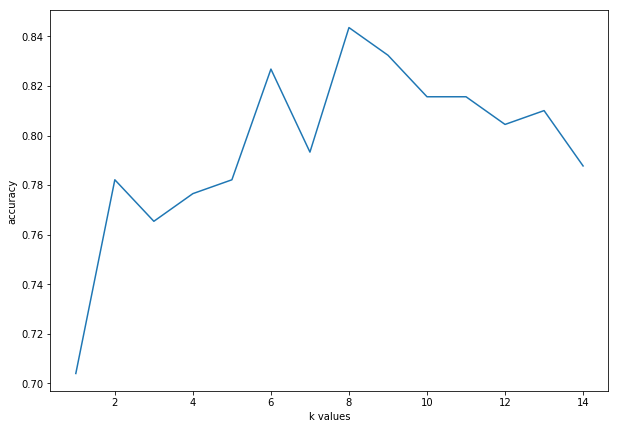

In [170]:
from sklearn.neighbors import KNeighborsClassifier
# find best k value 
score_list = []
for each in range(1,15):
    knn = KNeighborsClassifier(n_neighbors = each)
    knn.fit(x_train,y_train)
    score_list.append(knn.score(x_test,y_test))
 
plt.figure(figsize=(10,7))
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [171]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(x_train,y_train)
print(knn.score(x_test,y_test))
accuracy_list.append(knn.score(x_test,y_test))

0.8435754189944135


In [172]:
#Estimated number of survivors
y_pred = knn.predict(x_test)
y_true = y_test
confusion_matrix(y_true,y_pred)

array([[96,  9],
       [19, 55]])

In [173]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       105
           1       0.86      0.74      0.80        74

   micro avg       0.84      0.84      0.84       179
   macro avg       0.85      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179




### Support Vector Machine (SVM) Algorithm

In [174]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train,y_train)
print("accuracy",svm.score(x_test,y_test))
accuracy_list.append(svm.score(x_test,y_test))

accuracy 0.7821229050279329


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [175]:
y_pred = svm.predict(x_test)
y_true = y_test
confusion_matrix(y_true,y_pred)



array([[88, 17],
       [22, 52]])

In [176]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

   micro avg       0.78      0.78      0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179




### Naive Bayes Algorithm

In [177]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
print("accuracy: ",nb.score(x_test,y_test))
accuracy_list.append(nb.score(x_test,y_test))

accuracy:  0.770949720670391


In [178]:
#Estimated number of survivors
y_pred = nb.predict(x_test)
y_true = y_test
confusion_matrix(y_true,y_pred)

array([[78, 27],
       [14, 60]])

In [179]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       105
           1       0.69      0.81      0.75        74

   micro avg       0.77      0.77      0.77       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.77      0.77       179




### Decision Tree Algorithm

In [180]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("score: ", dt.score(x_test,y_test))
accuracy_list.append(dt.score(x_test,y_test))

score:  0.8156424581005587


In [181]:

y_pred = dt.predict(x_test)
y_true = y_test
confusion_matrix(y_true,y_pred)




array([[93, 12],
       [21, 53]])

In [182]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

   micro avg       0.82      0.82      0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179




### Random Forest Algorithm

In [183]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200,random_state = 42)
rf.fit(x_train,y_train)
print(rf.score(x_test,y_test))
accuracy_list.append(rf.score(x_test,y_test))

0.8379888268156425


In [184]:

y_pred = rf.predict(x_test)
y_true = y_test
confusion_matrix(y_true,y_pred)


array([[93, 12],
       [17, 57]])

In [185]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.83      0.77      0.80        74

   micro avg       0.84      0.84      0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179




### Evaluation Classification Models

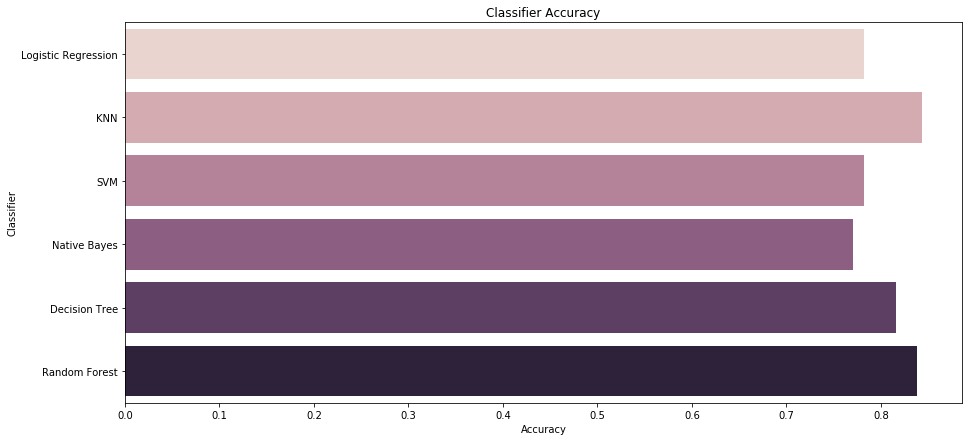

In [186]:
#Classifier Accuracy
f,ax = plt.subplots(figsize = (15,7))
sns.barplot(x=accuracy_list,y=column,palette = sns.cubehelix_palette(len(accuracy_list)))
plt.xlabel("Accuracy")
plt.ylabel("Classifier")
plt.title('Classifier Accuracy')
plt.show()

# The best model is K-Nearest Neigbor 